# Data Cleaning

## Import Packages

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Training Data

In [15]:
train_df = pd.read_csv('pisa2009train.csv')

In [16]:
train_df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


## Null Values

We see there are a lot of null values, those will affect our ability to model so we remove them.

In [17]:
train_df.shape

(3663, 24)

In [18]:
train_df.dropna(inplace=True)

In [19]:
train_df.shape

(2414, 24)

This cut off a lot of rows, but we still have a big enough sample to work with.

In [20]:
train_df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
9,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90


Let's explore our columns more.

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 1 to 3662
Data columns (total 24 columns):
grade                    2414 non-null int64
male                     2414 non-null int64
raceeth                  2414 non-null object
preschool                2414 non-null float64
expectBachelors          2414 non-null float64
motherHS                 2414 non-null float64
motherBachelors          2414 non-null float64
motherWork               2414 non-null float64
fatherHS                 2414 non-null float64
fatherBachelors          2414 non-null float64
fatherWork               2414 non-null float64
selfBornUS               2414 non-null float64
motherBornUS             2414 non-null float64
fatherBornUS             2414 non-null float64
englishAtHome            2414 non-null float64
computerForSchoolwork    2414 non-null float64
read30MinsADay           2414 non-null float64
minutesPerWeekEnglish    2414 non-null float64
studentsInEnglish        2414 non-null float64
schoo

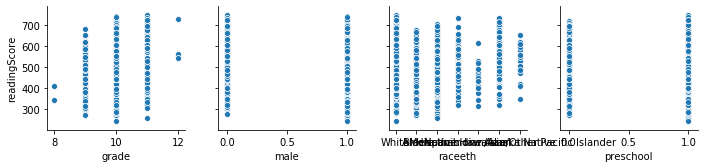

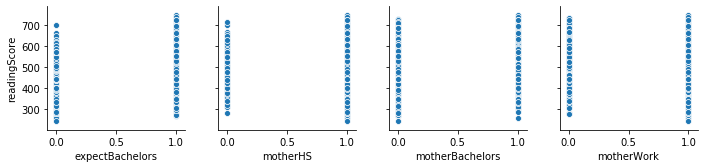

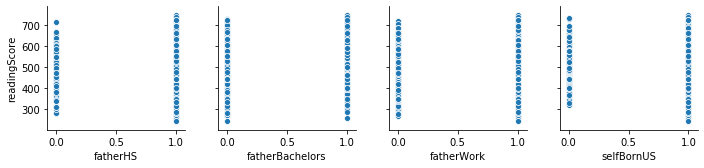

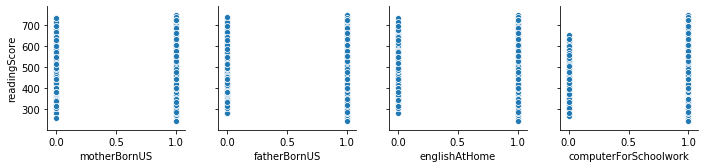

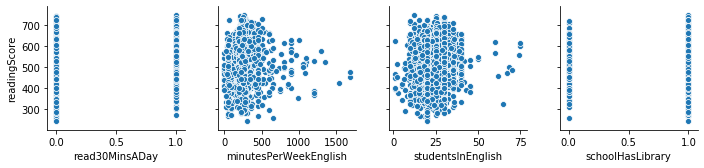

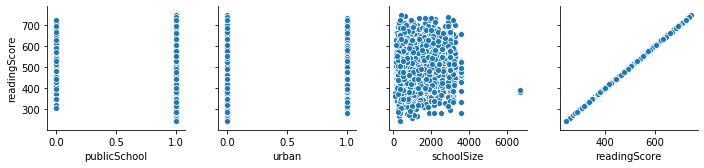

In [53]:
for i in range(0,len(train_df.columns),4):
    columns = []
    for x in range(4):
        columns.append(train_df.columns[i+x])
    sns.pairplot(train_df,y_vars='readingScore',x_vars=columns)

In [28]:
train_df['raceeth'].unique()

array(['White', 'Black', 'Hispanic', 'More than one race',
       'American Indian/Alaska Native', 'Asian',
       'Native Hawaiian/Other Pacific Islander'], dtype=object)

### Testing Code

In [ ]:
# for i in range(0,len(train_df.columns),4):
#     columns = []
#     for x in range(4):
#         columns.append(train_df.columns[i+x])
#     sns.pairplot(train_df, vars=columns)
# # range(len(train_df.columns))

In [54]:
# sns.pairplot(train_df)